# Q6.1: Backpropagation From Scratch (Iris)

Implement a small neural network using NumPy and train it using **manual forward + backward propagation** (no Keras training loop).

**Exam outputs:** loss vs epochs and final learned weights/biases; report test accuracy.

## Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode labels
y_onehot = np.zeros((y.size, 3))
y_onehot[np.arange(y.size), y] = 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {y_train.shape[1]}")

Training samples: 120
Test samples: 30
Features: 4
Classes: 3


## Step 2: Define Activation Functions

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

print("Activation functions defined")

Activation functions defined


## Step 3: Initialize Neural Network

### Architecture: 4 → 8 → 3

In [3]:
# Network architecture
n_input = 4
n_hidden = 8
n_output = 3

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(n_input, n_hidden) * 0.5
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.5
b2 = np.zeros((1, n_output))

print(f"W1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")

W1 shape: (4, 8)
b1 shape: (1, 8)
W2 shape: (8, 3)
b2 shape: (1, 3)


## Step 4: Forward Propagation

In [4]:
def forward_prop(X, W1, b1, W2, b2):
    # Hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    
    # Output layer
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}
    return a2, cache

print("Forward propagation function defined")

Forward propagation function defined


## Step 5: Compute Loss (Cross-Entropy)

In [5]:
def compute_loss(y_pred, y_true):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss

print("Loss function defined")

Loss function defined


## Step 6: Backward Propagation

In [6]:
def backward_prop(X, y_true, cache, W2):
    m = X.shape[0]
    
    # Extract from cache
    a1 = cache['a1']
    a2 = cache['a2']
    z1 = cache['z1']
    
    # Output layer gradient
    dz2 = a2 - y_true  # Softmax + Cross-Entropy derivative
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    # Hidden layer gradient
    dz1 = np.dot(dz2, W2.T) * sigmoid_deriv(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

print("Backward propagation function defined")

Backward propagation function defined


## Step 7: Update Weights

In [7]:
def update_weights(W1, b1, W2, b2, grads, lr):
    W1 -= lr * grads['dW1']
    b1 -= lr * grads['db1']
    W2 -= lr * grads['dW2']
    b2 -= lr * grads['db2']
    return W1, b1, W2, b2

print("Weight update function defined")

Weight update function defined


## Step 8: Training Loop

In [8]:
# Training hyperparameters
lr = 0.1
epochs = 1000
loss_history = []

# Training
for epoch in range(epochs):
    # Forward pass
    y_pred, cache = forward_prop(X_train, W1, b1, W2, b2)
    
    # Compute loss
    loss = compute_loss(y_pred, y_train)
    loss_history.append(loss)
    
    # Backward pass
    grads = backward_prop(X_train, y_train, cache, W2)
    
    # Update weights
    W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, grads, lr)
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

print("\nTraining complete!")

Epoch 100/1000, Loss: 0.5938
Epoch 200/1000, Loss: 0.4241
Epoch 300/1000, Loss: 0.3489
Epoch 400/1000, Loss: 0.2972
Epoch 500/1000, Loss: 0.2559
Epoch 600/1000, Loss: 0.2219
Epoch 700/1000, Loss: 0.1945
Epoch 800/1000, Loss: 0.1728
Epoch 900/1000, Loss: 0.1555
Epoch 1000/1000, Loss: 0.1418

Training complete!


## Step 9: Evaluate on Test Set

In [9]:
# Test set prediction
y_pred_test, _ = forward_prop(X_test, W1, b1, W2, b2)
y_pred_class = np.argmax(y_pred_test, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Calculate accuracy
acc = np.mean(y_pred_class == y_test_class) * 100

print(f"Test Accuracy: {acc:.2f}%")
print(f"\nSample predictions (first 10):")
for i in range(10):
    print(f"True: {y_test_class[i]}, Predicted: {y_pred_class[i]}")

Test Accuracy: 100.00%

Sample predictions (first 10):
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 2, Predicted: 2
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 2, Predicted: 2
True: 1, Predicted: 1
True: 1, Predicted: 1


## Step 10: Plot Training Loss

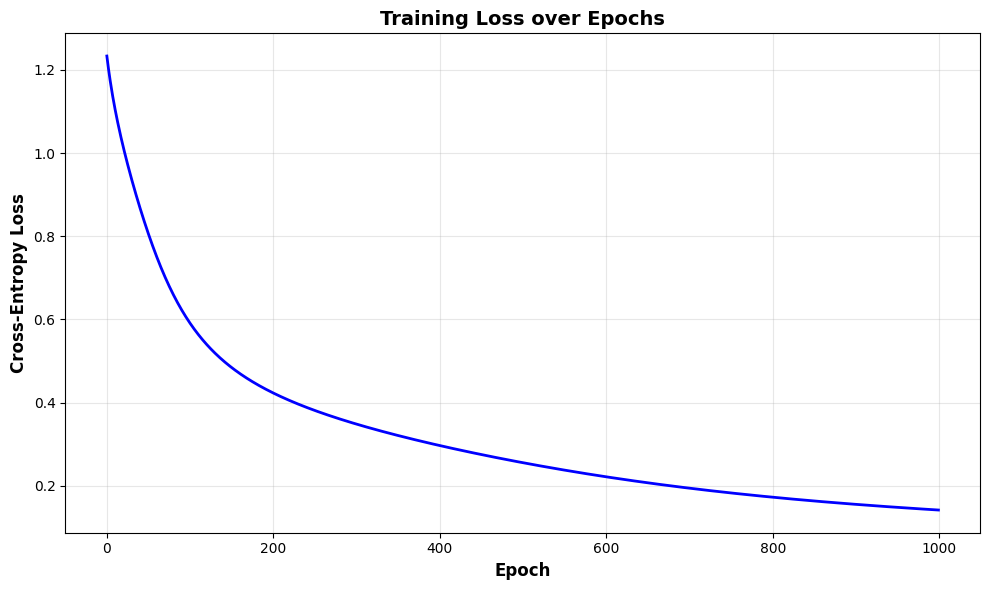

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, linewidth=2, color='blue')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Entropy Loss', fontsize=12, fontweight='bold')
plt.title('Training Loss over Epochs', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 11: Display Final Weights

In [11]:
print("Final W1 (Input → Hidden):")
print(W1)
print(f"\nFinal b1:\n{b1}")
print(f"\nFinal W2 (Hidden → Output):")
print(W2)
print(f"\nFinal b2:\n{b2}")

Final W1 (Input → Hidden):
[[-0.10931431 -0.23217093  0.95528857  0.41261953  0.05163235  0.22133435
   0.94663441  0.56610904]
 [ 0.74940899  0.14227752 -1.12972113  0.16947827 -0.59353482  0.15313587
  -1.19228812 -0.88829155]
 [-1.12473466 -0.68344414  0.75658508 -1.44129013  1.57919966 -1.41027705
   0.12280056  0.05152145]
 [-0.66902071 -1.17000413  0.63851779 -0.62172375  0.6983939  -1.87755312
  -0.43006651  1.73625237]]

Final b1:
[[-0.32961139  0.57739274  0.23175954  0.19607537 -0.22541305  1.52661141
   0.06637497 -0.16975817]]

Final W2 (Hidden → Output):
[[ 1.49641492 -0.77103949 -0.84970705]
 [ 0.33436807  0.29370844 -2.1139016 ]
 [-1.90564915  0.52354269  1.18567734]
 [ 0.97310536  0.13282528 -1.22862249]
 [-2.37650385 -0.36090837  1.40790974]
 [ 1.86819336  1.26573231 -3.31507549]
 [-0.93569807  0.69564226 -0.12890435]
 [-1.40802121  0.52288937  2.1721098 ]]

Final b2:
[[ 0.32693792 -0.27188699 -0.05505094]]


## Summary

**Backpropagation Steps:**
1. **Forward Pass**: Calculate activations layer-by-layer
2. **Loss Calculation**: Cross-entropy for multiclass
3. **Backward Pass**: Compute gradients using chain rule
4. **Weight Update**: Apply learning rate to gradients

**Key Equations:**
- Hidden layer: `dz1 = dz2 · W2ᵀ ⊙ σ'(z1)`
- Output layer: `dz2 = a2 - y` (softmax + cross-entropy)
- Weight gradients: `dW = (1/m) · Xᵀ · dz`